In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/BigDataGrupaDruga/BigDataDiamonds/refs/heads/main/Task%202/DataWithValues/DanezWartosciami.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut value,color value,clarity value
0,0,0.23,IDEAL,E,SI2,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,1,0.21,PREMIUM,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,2,0.23,GOOD,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,3,0.29,PREMIUM,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,4,0.31,GOOD,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2


In [5]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,cut value,color value,clarity value
44388,44388,0.72,IDEAL,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,7,3
44389,44389,0.72,GOOD,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,7,3
44390,44390,0.70,VERY GOOD,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,7,3
44391,44391,0.86,PREMIUM,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,3,2
44392,44392,0.75,IDEAL,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,5,7,2


In [7]:
df.drop(columns=['Unnamed: 0', 'cut', 'color', 'clarity'], inplace=True)

In [9]:
df.head()

,carat,depth,table,price,x,y,z,cut value,color value,clarity value
0,0.23,61.5,55.0,326,3.95,3.98,2.43,5,6,2
1,0.21,59.8,61.0,326,3.89,3.84,2.31,4,6,3
2,0.23,56.9,65.0,327,4.05,4.07,2.31,2,6,5
3,0.29,62.4,58.0,334,4.20,4.23,2.63,4,2,4
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,2


In [11]:
X = df[['carat']]
X.head()

,carat
0,0.23
1,0.21
2,0.23
3,0.29
4,0.31


In [13]:
Y = df['price']
Y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [15]:
#import modułu Scikit-learn do treningu danych
from sklearn.model_selection import train_test_split

#podział danych na treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=44)

In [17]:
#wybór regresji liniowej jako modelu do treningu, czyli wskaźnika dopasowania cech diamentów(X) do ceny(Y)
from sklearn.linear_model import LinearRegression

In [19]:
#przeprowadzenie treningu metodą regresji liniopwej
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [21]:
print('Wynik treningu regresji liniowej wynosi : ' , model.score(X_train, Y_train))
print('Wynik testów regresji liniowej wynosi: ' , model.score(X_test, Y_test))

Wynik treningu regresji liniowej wynosi :  0.854006247151769
Wynik testów regresji liniowej wynosi:  0.8597620792673852


In [23]:
#Powyższy trening (czyli dopasowanie) wykonane metodą regresji liniowej wskazał, że przy korzystając z regresji liniowej 
#istnieje 85,40% relacja między ilością karatów a ich ceną.

#Ponadto wyniki testów pokrywają się z rezultatami treningowymi wzkazując na 85.98% zależność 
#dla danych testowych(w ujęciu liczba karatów - cena diamentów).

In [27]:
m = model.coef_.flatten()
b = model.intercept_.flatten()
print("m = {0}".format(m))
print("b = {0}".format(b))

m = [7652.47797544]
b = [-2226.40198816]


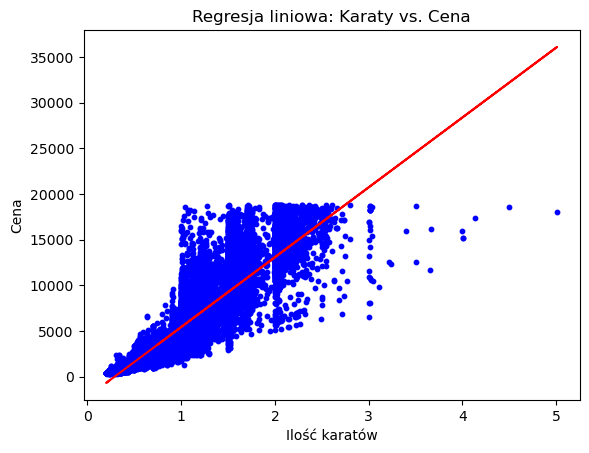

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X, Y,s=10, color='blue')
plt.plot(X, m*X+b, color='red')
plt.xlabel('Ilość karatów') 
plt.ylabel('Cena')    
plt.title('Regresja liniowa: Karaty vs. Cena')
plt.show()

In [31]:
# Powyższa wizualizacja stworzona na podstawie regresji liniowej wskazuje, że istnieje pewna zależność między ilością karatów a ceną.
# Z reguły im wyższa liczba karatów(czyli wagi diamentu, 1 karat to 0.2g) tym wyższa może być cena diamentu, 
# przy czym bazując na powyższych danych można zauważyć prawidłowość, że zarówno karaty o wartości 1 jak i o wartości większej (aż do 5)
# mogą osiągać cenę maksymalną(ok. 20 000).